Data Overview
- Dataset contains 14 features +1 target ('Class')
- Features: A1-A10(binary, age,sex,jaundice,family_asd(categorical)
- Target: Class(Yes= Autism, no= no autism)

In [128]:
import pandas as pd
df=pd.read_csv("C:/Users/Aleena Anna/Downloads/Autism_Screening_Data_Combined.csv")

In [129]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


EDA
- no missing values
- class imbalance
- all features are important and dependent on each other(proved through chi test)

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

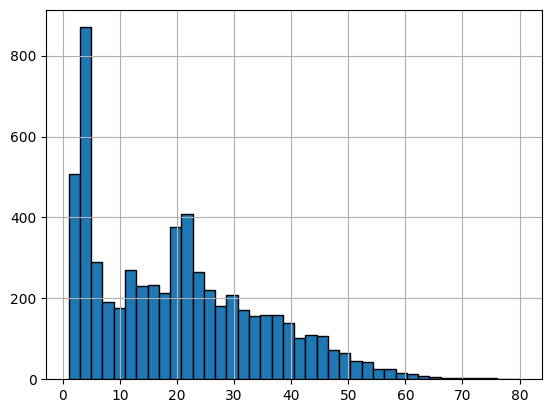

In [132]:
df["Age"].hist(bins=40, edgecolor="black")
plt.show()

In [134]:
bins=[0,1,5,12,19,30,50,80]
labels=["Infants (0-1)", 'Toddler(2-5)','Child(6-12)','Teen(13-19)', 'Young Adult(20-30)','Adult(31-50)','Older Adults(51-80)']
df["AgeGroup"]=pd.cut(df["Age"],bins=bins, labels=labels,right=True)
df["AgeGroup"].value_counts()

AgeGroup
Young Adult(20-30)     1521
Toddler(2-5)           1375
Adult(31-50)           1234
Teen(13-19)             819
Child(6-12)             768
Older Adults(51-80)     198
Infants (0-1)           160
Name: count, dtype: int64

In [135]:
#so autism screening for under 12 months olds are unreliable so dropping those rows atm 
#later will come back and bin them in 10-19 year


In [136]:
df=df[df["Age"]>1] #dropped 1 yo to reduce noise as it is not reliable

In [137]:
df.describe(include=["object"])

,Sex,Jauundice,Family_ASD,Class
count,5915,5915,5915,5915
unique,2,2,2,2
top,m,no,no,NO
freq,3421,4921,4813,4111


In [138]:
df["Class"].value_counts(normalize=True)

Class
NO     0.695013
YES    0.304987
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

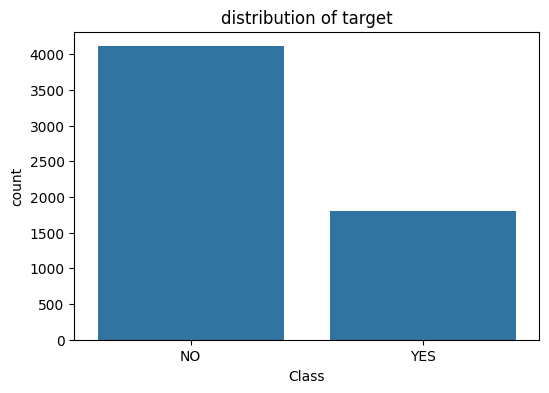

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Class")
plt.title("distribution of target")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

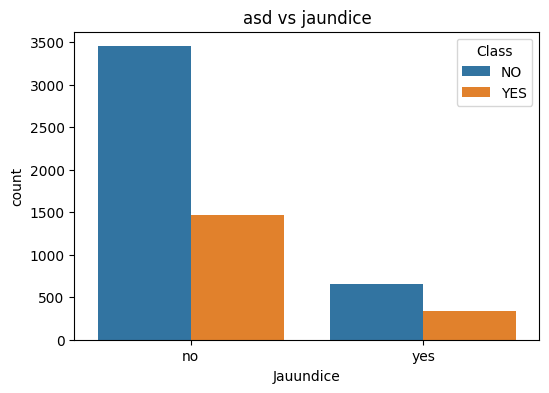

In [140]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Jauundice", hue="Class")
plt.title("asd vs jaundice")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

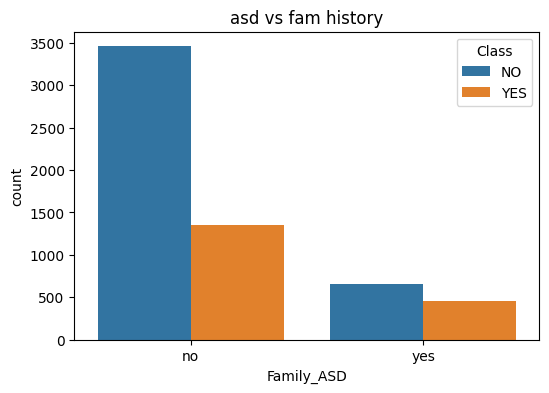

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Family_ASD", hue="Class")
plt.title("asd vs fam history")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

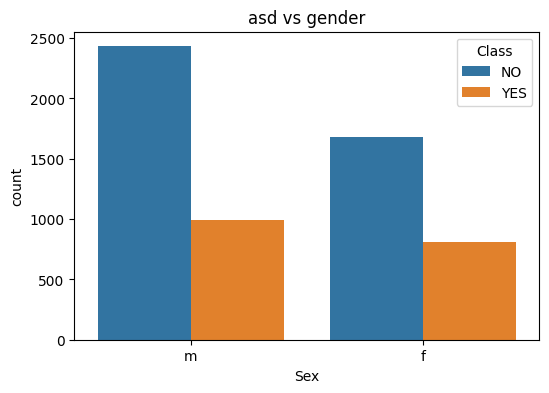

In [142]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", hue="Class")
plt.title("asd vs gender")
plt.show

In [143]:
screen_col=[col for col in df.columns if col.startswith("A") and col[1:].isdigit()]

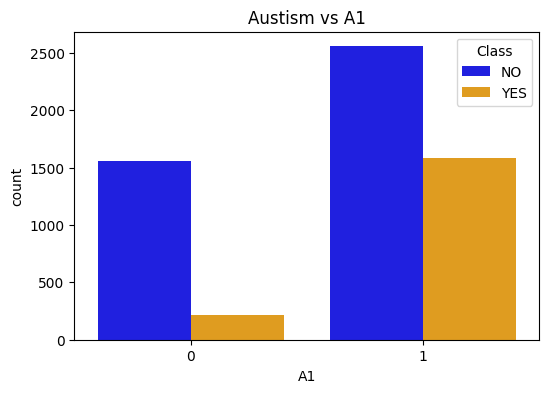

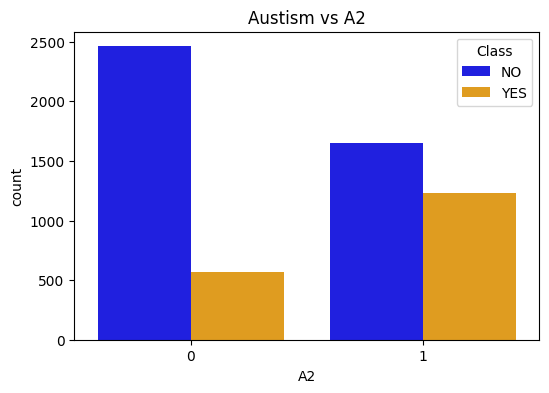

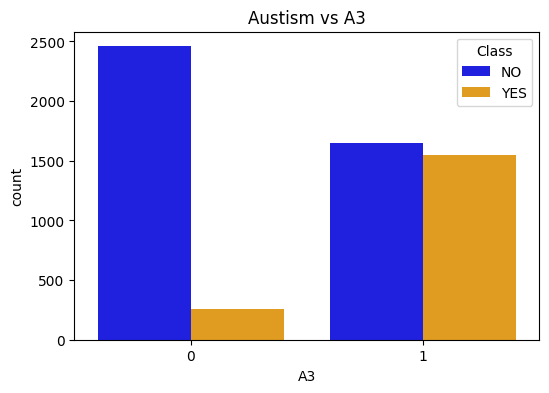

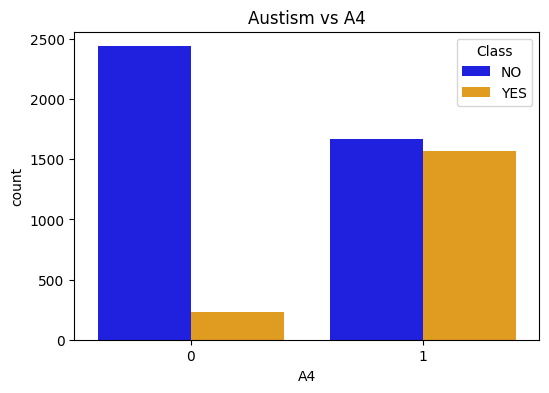

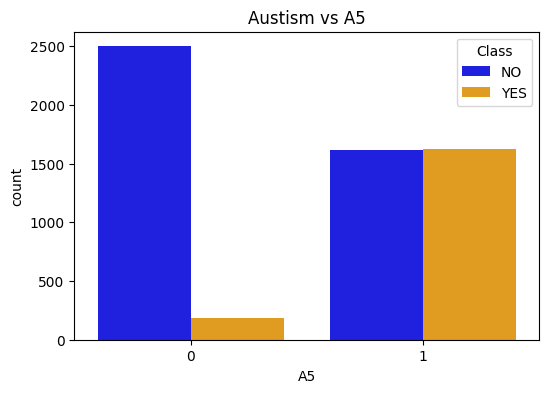

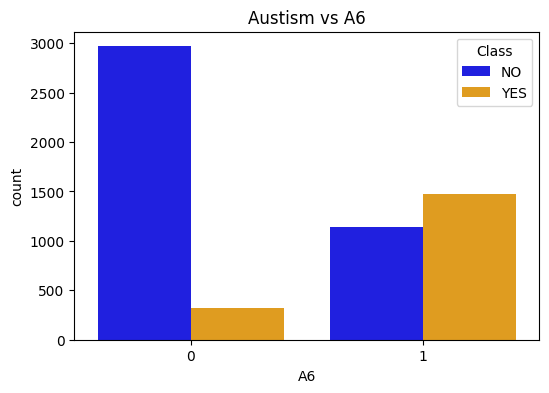

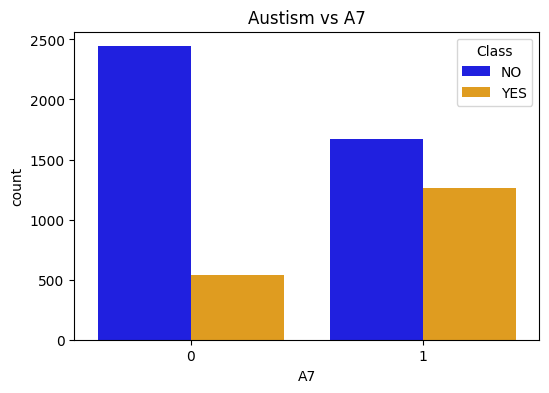

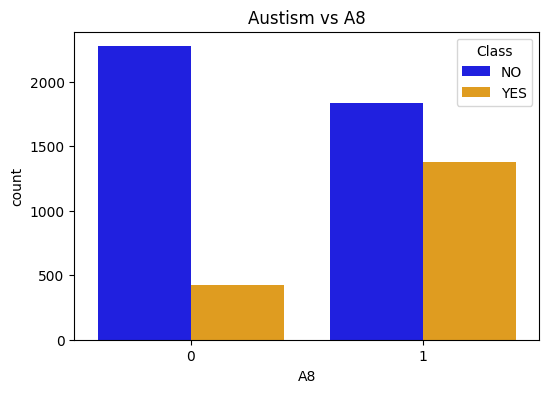

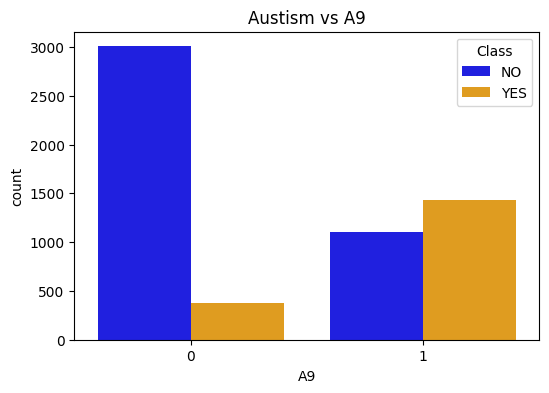

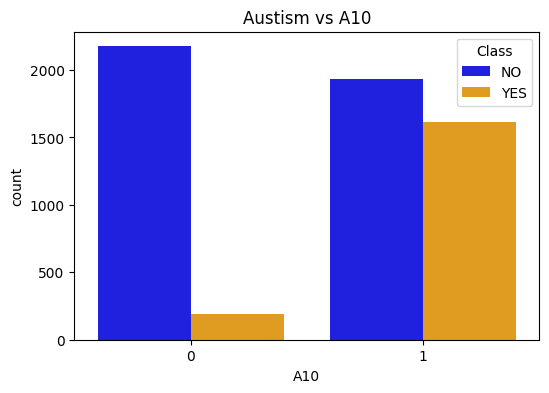

In [144]:
for col in screen_col:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col,hue="Class", hue_order=["NO","YES"], palette={'NO':"blue","YES":"orange"})
    plt.title(f"Austism vs {col}") 
    plt.show

In [145]:
pd.crosstab(df["Jauundice"],df["Class"], normalize="index")

Class,NO,YES
Jauundice,,
no,0.701077,0.298923
yes,0.664990,0.335010


In [146]:
pd.crosstab(df["Family_ASD"],df["Class"], normalize="index")

Class,NO,YES
Family_ASD,,
no,0.718471,0.281529
yes,0.592559,0.407441


In [147]:
pd.crosstab(df["Age"],df["Class"], normalize="index")

Class,NO,YES
Age,,
2,1.000000,0.000000
3,1.000000,0.000000
4,0.535604,0.464396
5,0.525316,0.474684
6,0.492424,0.507576
...,...,...
73,1.000000,0.000000
74,0.000000,1.000000
76,0.666667,0.333333


In [148]:
pd.crosstab(df["Sex"],df["Class"], normalize="index")

Class,NO,YES
Sex,,
f,0.673617,0.326383
m,0.710611,0.289389


In [149]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class,AgeGroup
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO,Teen(13-19)
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO,Teen(13-19)
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES,Teen(13-19)
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES,Teen(13-19)
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES,Teen(13-19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6069,0,0,0,0,0,0,0,0,0,0,3,f,no,no,NO,Toddler(2-5)
6070,0,0,0,0,0,0,0,0,0,1,2,f,no,yes,NO,Toddler(2-5)
6072,1,0,1,1,1,1,1,1,1,1,2,m,yes,no,NO,Toddler(2-5)
6073,1,0,0,0,0,0,0,1,0,1,2,m,no,yes,NO,Toddler(2-5)


In [150]:
pd.crosstab(df["AgeGroup"],df["Sex"], normalize="index")

Sex,f,m
AgeGroup,,
Toddler(2-5),0.274182,0.725818
Child(6-12),0.416667,0.583333
Teen(13-19),0.532357,0.467643
Young Adult(20-30),0.461538,0.538462
Adult(31-50),0.472447,0.527553
Older Adults(51-80),0.383838,0.616162


In [151]:
for cols in screen_col:
    df1=pd.crosstab(df[cols], df["Class"],normalize="index")
    print (df1)

Class        NO       YES
A1                       
0      0.876550  0.123450
1      0.617242  0.382758
Class        NO       YES
A2                       
0      0.811675  0.188325
1      0.572320  0.427680
Class        NO       YES
A3                       
0      0.904709  0.095291
1      0.516734  0.483266
Class        NO       YES
A4                       
0      0.913141  0.086859
1      0.515413  0.484587
Class        NO       YES
A5                       
0      0.931742  0.068258
1      0.498763  0.501237
Class        NO       YES
A6                       
0      0.901276  0.098724
1      0.436142  0.563858
Class        NO       YES
A7                       
0      0.819463  0.180537
1      0.568654  0.431346
Class        NO       YES
A8                       
0      0.843217  0.156783
1      0.570718  0.429282
Class        NO       YES
A9                       
0      0.889349  0.110651
1      0.435897  0.564103
Class        NO       YES
A10                      
0      0.918

In [152]:
##correlations/heatmap not required because the data is categorical
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class,AgeGroup
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO,Teen(13-19)
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO,Teen(13-19)
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES,Teen(13-19)
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES,Teen(13-19)
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES,Teen(13-19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6069,0,0,0,0,0,0,0,0,0,0,3,f,no,no,NO,Toddler(2-5)
6070,0,0,0,0,0,0,0,0,0,1,2,f,no,yes,NO,Toddler(2-5)
6072,1,0,1,1,1,1,1,1,1,1,2,m,yes,no,NO,Toddler(2-5)
6073,1,0,0,0,0,0,0,1,0,1,2,m,no,yes,NO,Toddler(2-5)


In [153]:
from scipy.stats import chi2_contingency,f_oneway

In [154]:
for col in df:
    contingency_table=pd.crosstab(df[col],df["Class"])
    chi2,p,dof,expected=chi2_contingency(contingency_table)
    print(f"{col}: pvalue={p}")

A1: pvalue=2.0897404207140375e-87
A2: pvalue=1.2968931595889315e-88
A3: pvalue=1.8225461254557352e-228
A4: pvalue=2.5431627848431935e-239
A5: pvalue=1.8974472190363845e-283
A6: pvalue=0.0
A7: pvalue=3.546388672304587e-97
A8: pvalue=1.597727470856099e-113
A9: pvalue=4.620329172473721e-307
A10: pvalue=1.5659576263662159e-204
Age: pvalue=4.524532886483486e-132
Sex: pvalue=0.0025018034833685695
Jauundice: pvalue=0.02667433601641303
Family_ASD: pvalue=3.5469647345676883e-16
Class: pvalue=0.0
AgeGroup: pvalue=5.702158019917309e-75


Model Building

- logistic regression as baseline model
- random forest for comparison

In [155]:
df=pd.get_dummies(df,columns=['Jauundice','Family_ASD','AgeGroup','Sex'])


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [157]:
X=df.copy()
Y=X.pop("Class")

In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(Y)
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'NO': 0, 'YES': 1}


In [173]:
model=LogisticRegression(max_iter=10000,class_weight='balanced')

In [174]:
lr=model.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)
from sklearn.metrics import classification_report,accuracy_score
acc=accuracy_score(ytest,y_pred)
cr=classification_report(ytest,y_pred)
print (acc)

0.9239222316145393


In [190]:
print("Classification report for logistic regression:\n",cr)

Classification report for logistic regression:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       809
           1       0.83      0.95      0.89       374

    accuracy                           0.92      1183
   macro avg       0.90      0.93      0.92      1183
weighted avg       0.93      0.92      0.93      1183



In [176]:
#checking for overfitting
train_acc = accuracy_score(ytrain, model.predict(xtrain))
print(ac)

0.9376064217951836


In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf=RandomForestClassifier(n_estimators=100).fit(xtrain,ytrain)

In [179]:
acc3=accuracy_score(ytest,rf.predict(xtest))
cr2=classification_report(ytest,rf.predict(xtest))

print(acc3)

0.978021978021978


In [180]:
rf=RandomForestClassifier(n_estimators=100).fit(xtrain,ytrain)

In [192]:
print("Classification report for Random Forest:\n",cr2)

Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       809
           1       0.95      0.96      0.95       374

    accuracy                           0.97      1183
   macro avg       0.97      0.97      0.97      1183
weighted avg       0.97      0.97      0.97      1183



In [182]:
acc3=accuracy_score(ytest,rf.predict(xtest))
cr2=classification_report(ytest,rf.predict(xtest))

print(acc3)

0.9712595097210481


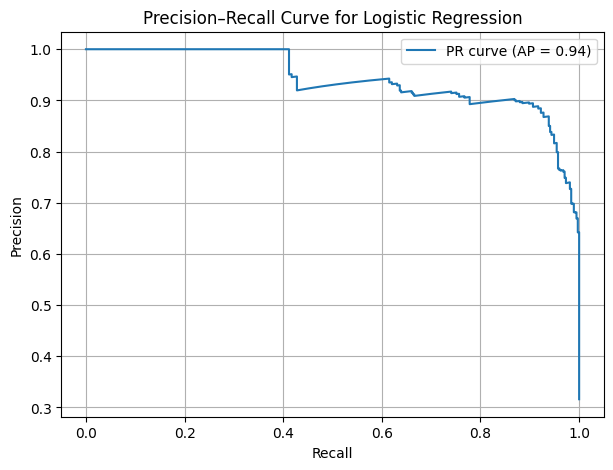

In [193]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities
y_scores = lr.predict_proba(xtest)[:, 1]

# Precision-Recall values
precision, recall, thresholds = precision_recall_curve(ytest, y_scores)
avg_precision = average_precision_score(ytest, y_scores)

# Plot PR curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"PR curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


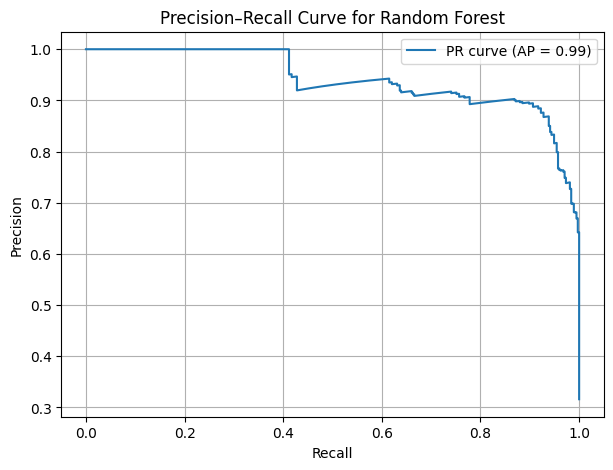

In [194]:
y_score= rf.predict_proba(xtest)[:, 1]

precision1, recall1, thresholds1 = precision_recall_curve(ytest, y_scores)
avg_precision = average_precision_score(ytest, y_score)

# Plot PR curve
plt.figure(figsize=(7, 5))
plt.plot(recall1, precision1, label=f"PR curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve for Random Forest")
plt.legend()
plt.grid(True)
plt.show()
